# Analysis of Evaluation Data

## Load Data

In [20]:
import json
import os
import matplotlib.pyplot as plt
import numpy as np

In [21]:
def load_data(data_dir):
    json_data = []
    for root, dirs, files in os.walk(data_dir):
        for file in files:
            if file.endswith('.json'):
                with open(os.path.join(root, file), 'r') as fp:
                    dd = json.load(fp)
                    json_data.append(dd)
    return json_data

In [22]:
DATA_DIR_DEFAULT = '2022-02-02_bigFlows-default'
DATA_DIR_M1 = '2022-02-02_bigFlows-m1'
json_data_default = load_data(DATA_DIR_DEFAULT)
json_data_m1 = load_data(DATA_DIR_M1)

## Compute Time Deltas

In [23]:
deltas_default = []
for json_obj in json_data_default:
    t0 = json_obj['timestampBeforeMiningFirstFlowPacket']
    t1 = json_obj['timestampBeforeEmittingToSocketBroadcaster']
    deltas_default.append(t1-t0)

deltas_m1 = []
for json_obj in json_data_m1:
    t0 = json_obj['timestampBeforeMiningFirstFlowPacket']
    t1 = json_obj['timestampBeforeEmittingToSocketBroadcaster']
    deltas_m1.append(t1-t0)


## Visualization

### Softflowd Default Configuration

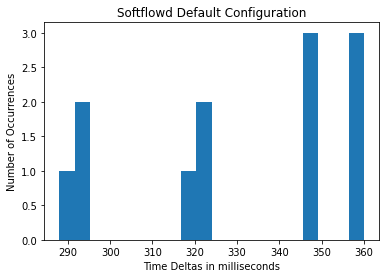

In [24]:
plt.hist(deltas_default, bins=20)
plt.title('Softflowd Default Configuration')
plt.xlabel('Time Deltas in milliseconds')
plt.ylabel('Number of Occurrences')
plt.savefig('softflowd_default')
plt.show()

In [25]:
print(deltas_default)
print('N: {}'.format(len(deltas_default)))
print('mean: {}'.format(np.mean(deltas_default)))
print('median: {}'.format(np.median(deltas_default)))
print('std: {}'.format(np.std(deltas_default)))


[358, 359, 347, 346, 322, 295, 360, 348, 320, 321, 294, 288]
N: 12
mean: 329.8333333333333
median: 334.0
std: 25.696411336129323


### Softflowd -m 1 Configuration

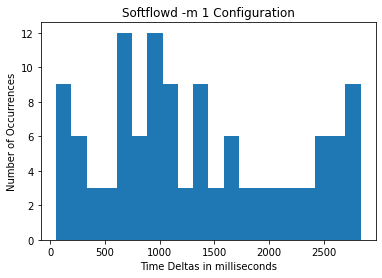

In [26]:
plt.hist(deltas_m1, bins=20)
plt.title('Softflowd -m 1 Configuration')
plt.xlabel('Time Deltas in milliseconds')
plt.ylabel('Number of Occurrences')
plt.savefig('softflowd_m1')
plt.show()

In [27]:
print(deltas_m1)
print('N: {}'.format(len(deltas_m1)))
print('mean: {}'.format(np.mean(deltas_m1)))
print('median: {}'.format(np.median(deltas_m1)))
print('std: {}'.format(np.std(deltas_m1)))

[1159, 671, 1173, 629, 1107, 410, 1662, 56, 2400, 1172, 2630, 719, 2835, 1097, 1850, 786, 1400, 1001, 597, 892, 214, 2603, 2455, 1308, 1001, 766, 1608, 171, 1525, 947, 718, 2631, 112, 1894, 56, 947, 1524, 2709, 1662, 1107, 669, 2085, 2711, 766, 2455, 2604, 749, 963, 1413, 893, 284, 2530, 787, 1850, 1413, 963, 2245, 2245, 1850, 1096, 2529, 1400, 2400, 1173, 282, 213, 749, 1308, 2455, 2400, 1608, 766, 671, 1159, 596, 1107, 628, 2708, 410, 1892, 1004, 597, 113, 2835, 719, 170, 1525, 1609, 1308, 749, 2604, 213, 2081, 284, 893, 947, 1399, 787, 2530, 1096, 2082, 2245, 171, 2708, 2834, 113, 2631, 1413, 56, 1894, 2706, 1663, 410, 2708, 628, 1156, 963]
N: 117
mean: 1342.5042735042734
median: 1159.0
std: 826.1339021857846
